In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                                                               # Load dataset
df = pd.read_csv("Apple_DB.csv")

# Show first rows
print("Show first rows".center(80))
print(df.head())
print(df.info())
                                                              #Clean the data
# Remove duplicates
df = df.drop_duplicates()
# Check missing values
print("Check missing values".center(80))
print(df.isnull().sum())

# Summary statistics
print(df.describe())

                                                          

                                Show first rows                                 
   Year        Date  Quarter  NetSales_Products  NetSales_Services  \
0  2023  09/01/2023        4              67184              22314   
1  2023  06/01/2023        3              60584              21213   
2  2023  04/01/2023        2              73929              20907   
3  2022  12/01/2022        1              96388              20766   
4  2022  09/01/2022        4              70958              19188   

   NetSales_Total  COG_Products  COG_Services  COG_Total  Gross_margin  ...  \
0           89498         42586          6485      49071         40427  ...   
1           81797         39136          6248      45384         36413  ...   
2           94836         46795          6065      52860         41976  ...   
3          117154         60765          6057      66822         50332  ...   
4           90146         46387          5664      52051         38095  ...   

   LiabilitiesNC_Term_d

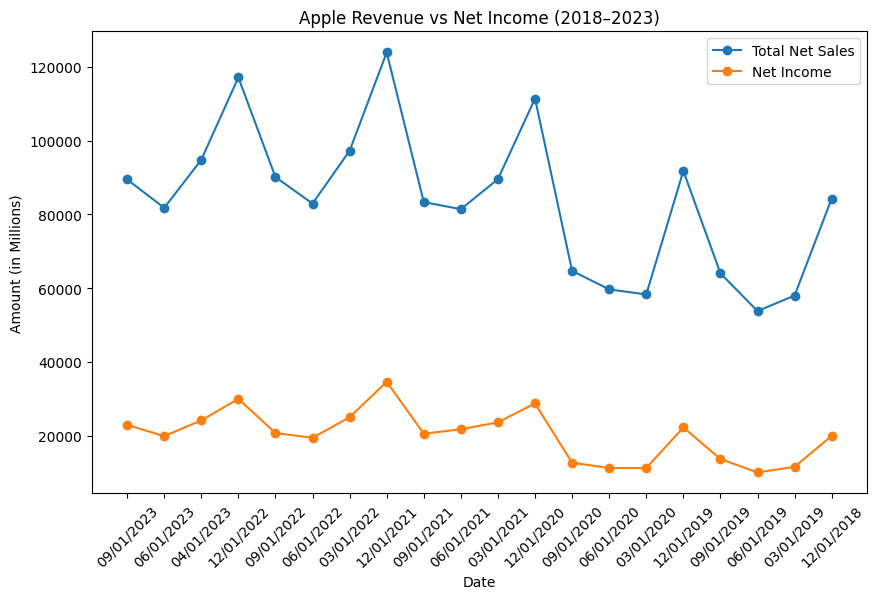

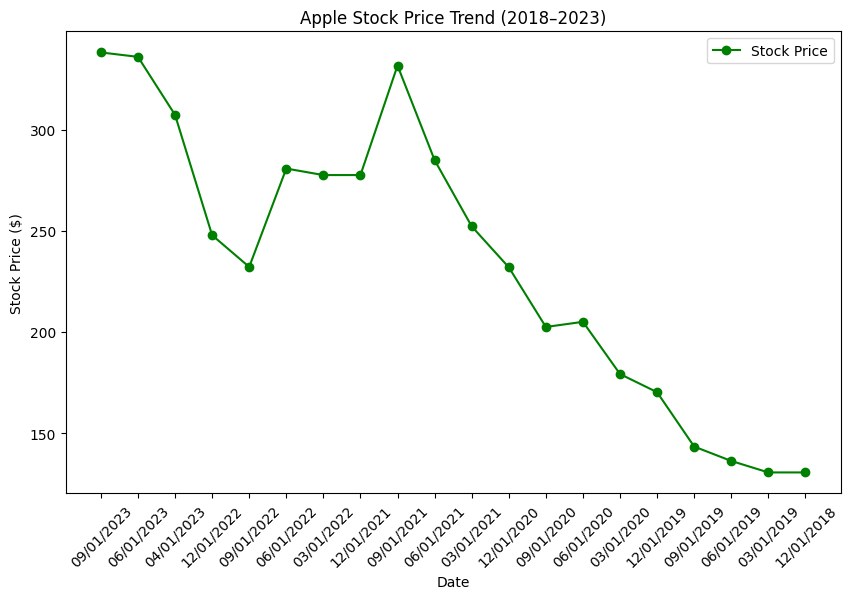

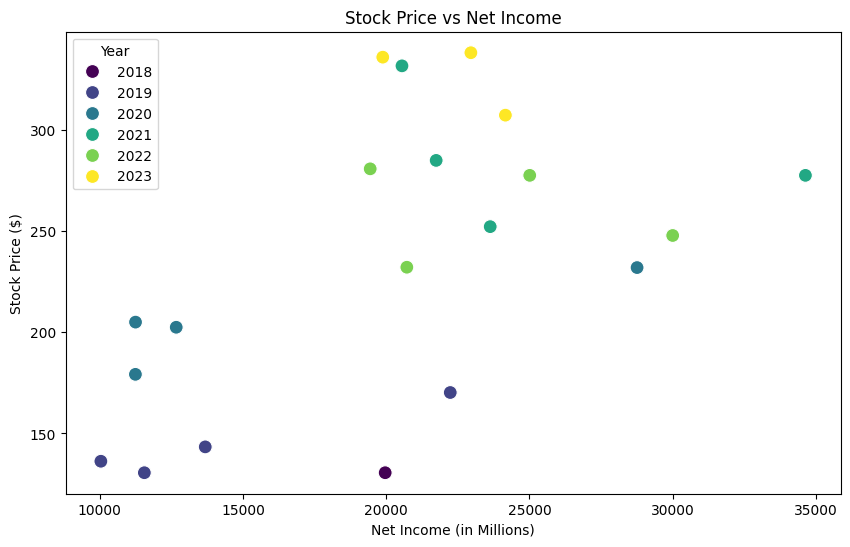

          Date  Profit_Margin  Debt_to_Equity
0   09/01/2023       0.256497        4.673462
1   06/01/2023       0.243053        4.558582
2   04/01/2023       0.254756        4.343801
3   12/01/2022       0.256056        5.112557
4   09/01/2022       0.229860        5.961537
5   06/01/2022       0.234357        4.787754
6   03/01/2022       0.257098        4.202777
7   12/01/2021       0.279398        4.299324
8   09/01/2021       0.246533        4.563512
9   06/01/2021       0.267014        4.131301
10  03/01/2021       0.263775        3.873775
11  12/01/2020       0.258034        4.346309
12  09/01/2020       0.195879        3.957039
13  06/01/2020       0.188540        3.390360
14  03/01/2020       0.192907        3.085432
15  12/01/2019       0.242172        2.804470
16  09/01/2019       0.213710        2.741004
17  06/01/2019       0.186660        2.340788
18  03/01/2019       0.199276        2.230663
19  12/01/2018       0.236805        2.170012


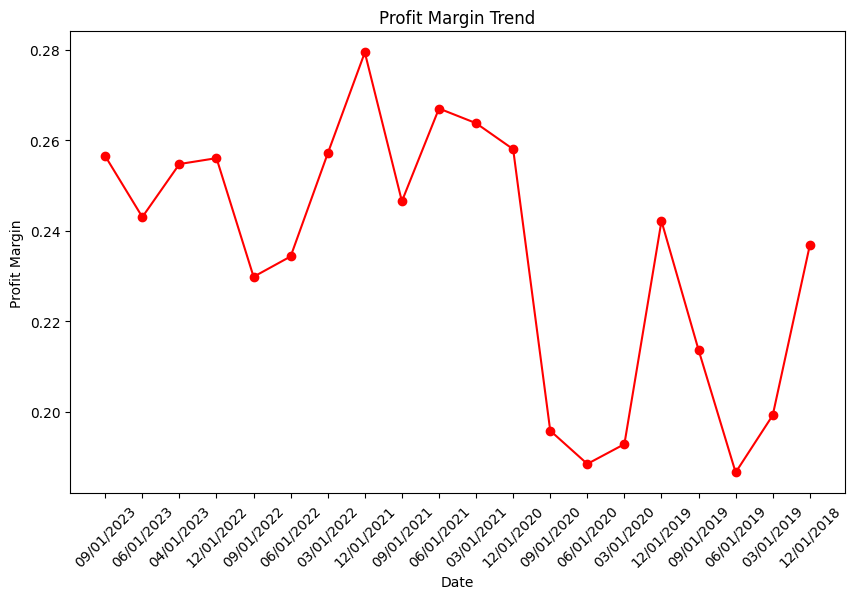

In [4]:
                                        #Key Financial Trends

# 1. Revenue & Net Income Trend
plt.figure(figsize=(10,6))
plt.plot(df["Date"], df["NetSales_Total"], marker="o", label="Total Net Sales")
plt.plot(df["Date"], df["Net_income"], marker="o", label="Net Income")
plt.xticks(rotation=45)
plt.title("Apple Revenue vs Net Income (2018–2023)")
plt.xlabel("Date")
plt.ylabel("Amount (in Millions)")
plt.legend()
plt.show()

# 2. Stock Price Trend
plt.figure(figsize=(10,6))
plt.plot(df["Date"], df["Stock_Price"], marker="o", color="green", label="Stock Price")
plt.xticks(rotation=45)
plt.title("Apple Stock Price Trend (2018–2023)")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

# 3. Stock Price vs Net Income (Scatter plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Net_income"], y=df["Stock_Price"], hue=df["Year"], palette="viridis", s=100)
plt.title("Stock Price vs Net Income")
plt.xlabel("Net Income (in Millions)")
plt.ylabel("Stock Price ($)")
plt.show()

#Ratios (Quick Finance Insights)
df["Profit_Margin"] = df["Net_income"] / df["NetSales_Total"]
df["Debt_to_Equity"] = df["Liabilities_Total"] / df["Shareholders_Equity_Total"]

print(df[["Date","Profit_Margin","Debt_to_Equity"]])

# Plot Profit Margin
plt.figure(figsize=(10,6))
plt.plot(df["Date"], df["Profit_Margin"], marker="o", color="red")
plt.xticks(rotation=45)
plt.title("Profit Margin Trend")
plt.xlabel("Date")
plt.ylabel("Profit Margin")
plt.show()


In [12]:
                                                      #  Key Summary Metrics 
summary = {
    "Average Revenue": df["NetSales_Total"].mean(),
    "Average Net Income": df["Net_income"].mean(),
    "Max Revenue": df["NetSales_Total"].max(),
    "Max Net Income": df["Net_income"].max(),
    "Min Revenue": df["NetSales_Total"].min(),
    "Min Net Income": df["Net_income"].min(),
    "Latest EPS": df["Earnings_per_share_Diluted"].iloc[-1],
    "Latest Stock Price": df["Stock_Price"].iloc[-1]
}

summary_df = pd.DataFrame(list(summary.items()), columns=["Metric", "Value"])
print(summary_df)

# Export summary + ratios to Excel
with pd.ExcelWriter("Financial_Report_Insights.xlsx") as writer:
    df.to_excel(writer, sheet_name="Raw Data", index=False)
    summary_df.to_excel(writer, sheet_name="Summary", index=False)
    
                                            #Insight Narration
latest_rev = df["NetSales_Total"].iloc[-1]
latest_income = df["Net_income"].iloc[-1]
pm = df["Profit_Margin"].iloc[-1]
                                     
insights = f"""
Financial Insights:
- Latest Revenue: {latest_rev:,.0f} million
- Latest Net Income: {latest_income:,.0f} million
- Profit Margin in last period: {pm:.2%}
- Revenue trend shows {'growth' if latest_rev > df['NetSales_Total'].iloc[0] else 'decline'} since 2018.
- Debt-to-Equity ratio is {df['Debt_to_Equity'].iloc[-1]:.2f}, 
  indicating {'high leverage' if df['Debt_to_Equity'].iloc[-1] > 2 else 'manageable risk'}.
"""
print(insights)

                                             # Save insights text to a text file
with open("Financial_Insights.txt", "w") as f:
    f.write(insights)


               Metric      Value
0     Average Revenue   83905.95
1  Average Net Income   20207.25
2         Max Revenue  123945.00
3      Max Net Income   34630.00
4         Min Revenue   53809.00
5      Min Net Income   10044.00
6          Latest EPS       4.18
7  Latest Stock Price     130.60

Financial Insights:
- Latest Revenue: 84,310 million
- Latest Net Income: 19,965 million
- Profit Margin in last period: 23.68%
- Revenue trend shows decline since 2018.
- Debt-to-Equity ratio is 2.17, 
  indicating high leverage.

